In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [4]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/classify_me.csv')

In [7]:
data

,Unnamed: 0,A,B,C,D,E,F,G,H,I,J,Target
0,0,0.150333,-1.468600,0.420842,-0.878333,-1.348358,0.686323,-0.663374,-2.301067,1.302455,0.320666,2
1,1,-1.632086,-0.705800,0.336495,0.024062,-0.493619,-1.534829,-0.024577,-0.296786,0.320047,0.506105,1
2,2,-1.285627,1.381077,-0.385668,1.446167,-0.348163,-2.255813,0.272703,-0.964729,-1.515589,0.454248,2
3,3,-0.012135,-0.729971,-1.132579,1.076787,1.235348,1.234472,-1.809369,0.735971,-1.349093,-0.061655,0
4,4,-1.303877,0.930213,0.801927,-1.750493,0.846840,-0.258996,-0.507816,0.560169,0.583438,-0.472208,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.116215,0.066620,1.434035,-0.829447,-1.025267,-1.372505,0.787712,0.239583,1.422715,-0.249433,0
996,996,0.495383,0.594304,-0.832994,0.846822,0.805704,0.582507,-0.476694,-0.181765,-1.017099,0.123959,1
997,997,0.247019,-0.527071,-1.397361,-0.945972,0.486671,-0.925210,-0.271900,-0.933125,-1.705268,-0.450054,0
998,998,1.620174,1.143916,0.242528,-0.937797,-0.390179,0.217223,-0.751655,-0.148348,0.042117,0.248499,1


1. Read in this file. How many classes are there? How many features are there? Are there any missing entries? 

In [8]:
data.drop(columns=['Unnamed: 0'], axis=1)

,A,B,C,D,E,F,G,H,I,J,Target
0,0.150333,-1.468600,0.420842,-0.878333,-1.348358,0.686323,-0.663374,-2.301067,1.302455,0.320666,2
1,-1.632086,-0.705800,0.336495,0.024062,-0.493619,-1.534829,-0.024577,-0.296786,0.320047,0.506105,1
2,-1.285627,1.381077,-0.385668,1.446167,-0.348163,-2.255813,0.272703,-0.964729,-1.515589,0.454248,2
3,-0.012135,-0.729971,-1.132579,1.076787,1.235348,1.234472,-1.809369,0.735971,-1.349093,-0.061655,0
4,-1.303877,0.930213,0.801927,-1.750493,0.846840,-0.258996,-0.507816,0.560169,0.583438,-0.472208,0
...,...,...,...,...,...,...,...,...,...,...,...
995,0.116215,0.066620,1.434035,-0.829447,-1.025267,-1.372505,0.787712,0.239583,1.422715,-0.249433,0
996,0.495383,0.594304,-0.832994,0.846822,0.805704,0.582507,-0.476694,-0.181765,-1.017099,0.123959,1
997,0.247019,-0.527071,-1.397361,-0.945972,0.486671,-0.925210,-0.271900,-0.933125,-1.705268,-0.450054,0
998,1.620174,1.143916,0.242528,-0.937797,-0.390179,0.217223,-0.751655,-0.148348,0.042117,0.248499,1


In [9]:
len(data.columns)

12

In [10]:
print(data.isnull().sum())

Unnamed: 0    0
A             0
B             0
C             0
D             0
E             0
F             0
G             0
H             0
I             0
J             0
Target        0
dtype: int64


2. Split into training and test sets (30% test set). Use random_state=5 so your splits are reproducible. 

In [11]:
X=data.drop('Target',axis=1)
y=data['Target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)

3. Use all the features to build a classifier on the training set. Try bagging, random forest, boosting, and k-nearest neighbors. For knn, cross validate the number of neighbors you use. In your random forest implementation, build the trees deep -- that is, do not set a value for max_depth. For bagging and random forest,  cross validate the number of trees you use (given by the n_estimators parameter). For your boosting model, validate all of the parameters: n_estimators, learning_rate, and max_depth. In all three models, set random_state=5 so the results are reproducible.  

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

In [14]:
knn_cv_results=[]
for k in range(1,50):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    cv_nn = cross_validate(knn_regressor, X_train, y_train, cv=5, scoring='r2')
    knn_cv_results.append(cv_nn['test_score'].mean())

In [15]:
np.argmax(knn_cv_results)

46

In [16]:
knn_reg_model=KNeighborsRegressor(n_neighbors=46).fit(X_train, y_train)

In [17]:
knn_reg_model.score(X_test,y_test)

-0.05577721786835821

**The is R2 for the KNN model is -0.055**

#Bagging

In [37]:
from sklearn.ensemble import BaggingRegressor

In [38]:
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=100,oob_score=True,random_state=0).fit(X_train, y_train)

In [39]:
print("R^2 is {}".format(regr.score(X_test,y_test)),":",":", "MSE is {}".format(mean_squared_error(regr.predict(X_test),y_test)))

R^2 is 0.06686137655076663 : : MSE is 0.5674623333333333


In [40]:
regr.oob_score_

0.13975380213349764

In [21]:
num_trees=np.linspace(50,500,10)
oob_res=[]
for trs in num_trees:
    res = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=int(trs),oob_score=True,random_state=0).fit(X_train, y_train)
    oob_res.append(res.oob_score_)

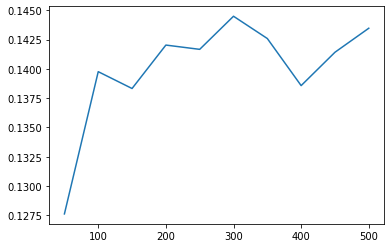

In [22]:
plt.plot(num_trees,oob_res)

In [23]:
num_trees[np.argmax(oob_res)]

300.0

In [24]:
opt_trs=int(num_trees[np.argmax(oob_res)])

In [31]:
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=opt_trs,random_state=5).fit(X_train, y_train)

In [32]:
np.round(regr.score(X_test,y_test),3)

0.06


**The R2 of the bagging model is 0.06**

**Random Forest Regressor**

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf = RandomForestRegressor(n_estimators=300,max_features='sqrt',random_state=5).fit(X_train,y_train)

In [47]:
rf.score(X_test,y_test)

0.0854884191165276

**The R2 for Random Forest Regressor is 0.085**

#Boosting


In [48]:
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
breg = GradientBoostingRegressor(random_state=0,learning_rate=0.1,n_estimators=500,max_depth=2).fit(X_train,y_train)

In [50]:
breg.score(X_test,y_test)

-0.09803107403591205

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
parameters = {'learning_rate':[0.1,0.01], 'n_estimators':[300,400,500],'max_depth':[2,3,4,5]}

In [53]:
bmod = GradientBoostingRegressor(random_state=5)

In [54]:
boost_regr = GridSearchCV(bmod, parameters)
boost_regr.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=5),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [300, 400, 500]})

In [55]:
df=pd.DataFrame.from_dict(boost_regr.cv_results_)

In [56]:
df[df['mean_test_score']==df['mean_test_score'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,1.270275,0.006669,0.003558,0.000081,0.01,4,500,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.144009,0.176699,0.038962,0.09989,0.212561,0.134424,0.060481,1


In [57]:
best_breg = GradientBoostingRegressor(random_state=0,learning_rate=0.01,n_estimators=500,max_depth=4).fit(X_train,y_train)

In [58]:
np.round(best_breg.score(X_test,y_test),3)

0.092

The R2 of boosting model is 0.092

4. Comment on which model gives the best results on the test set.  For the best model, comment on feature importances (if relevant). 

The boosting model gives a better result because it considers homogeneous weak learners and learns them in an a sequential manner. The models depend on their pervious ones. 


